*What is a unicorn company?\
A unicorn company, or unicorn startup, is a private company with a valuation over 1 billion USD. Variants include a decacorn, valued at over 10 billion USD, and a hectocorn, valued at over 100 billion USD.*

#### **Import Statement & Basic Discovery:**

In [1]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [2]:
companies = pd.read_csv(r"D:\Google Advanced Data Analytics\Projects_2026\Unicorn_Companies\Uni_Com_Web_Scraping.csv")

companies.head(n= 5)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,OpenAI,$500,7/22/2019,United States,San Francisco,Enterprise Tech,"Khosla Ventures, Thrive Capital, Sequoia Capital"
1,ByteDance,$480/td>,4/7/2017,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S..."
2,SpaceX,$400,12/1/2012,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
3,Anthropic,$350,2/3/2023,United States,San Francisco,Enterprise Tech,Google
4,Databricks,$100,2/5/2019,United States,San Francisco,Enterprise Tech,"Andreessen Horowitz, New Enterprise Associates..."


In [3]:
companies.info(show_counts= False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 7 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Company           object
 1   Valuation ($B)    object
 2   Date Joined       object
 3   Country           object
 4   City              object
 5   Industry          object
 6   Select Investors  object
dtypes: object(7)
memory usage: 72.8+ KB


#### **Data Cleaning & Wrangling:**

###### **Convert the `Date Joined` Field into  `date_joined` datetime64-format Field**:

In [4]:
companies['Date Joined'].describe()

count          1328
unique          878
top       7/13/2021
freq              8
Name: Date Joined, dtype: object

In [5]:
companies['date_joined'] = pd.to_datetime(companies['Date Joined'])

companies.drop(axis= 1, columns= ['Date Joined'], inplace= True)

In [6]:
companies['date_joined'].dt.year.value_counts().sort_index(ascending= False)

date_joined
2025    121
2024     85
2023     65
2022    243
2021    458
2020     92
2019     85
2018     83
2017     32
2016     16
2015     31
2014      9
2013      3
2012      4
2007      1
Name: count, dtype: int64

###### **Renaming & Fixing the `Valuation ($B)` Field Format**:

In [7]:
companies['Valuation ($B)'].describe()

count     1328
unique     268
top         $1
freq       295
Name: Valuation ($B), dtype: object

In [8]:
companies['Valuation ($B)'].head()

0        $500
1    $480/td>
2        $400
3        $350
4        $100
Name: Valuation ($B), dtype: object

In [9]:
# Helper Function for Formatting `Valuation ($B)` Field:

def convert_valuation(value):
    """
    1. Stripping the '$' Sign.
    2. Stripping the '/td>'.
    """
    value = value.replace('$', '')

    value = value.replace('/td>', '')

    return value

In [10]:
companies['Valuation ($B)'] = companies['Valuation ($B)'].apply(func= convert_valuation)

companies['valuation'] = companies['Valuation ($B)'].astype('float64')

In [11]:
companies.drop(axis= 1, columns= ['Valuation ($B)'], inplace= True)

round(companies['valuation'].describe(percentiles= [.5]), 2)

count    1328.00
mean        4.38
std        24.43
min         1.00
50%         1.60
max       500.00
Name: valuation, dtype: float64

###### **Unifying the `Industry` Field Format**:

In [12]:
companies['Industry'].value_counts().sort_values(ascending= False)

Industry
Enterprise Tech               471
Financial Services            225
Consumer & Retail             207
Industrials                   193
Healthcare & Life Sciences    124
Media & Entertainment          82
Insurance                      24
West Palm Beach                 1
Health                          1
Name: count, dtype: int64

In [13]:
companies['Industry'].replace(to_replace= 'West Palm Beach', value= 'Enterprise Tech', inplace= True)

companies['Industry'].replace(to_replace= 'Health', value= 'Healthcare & Life Sciences', inplace= True)

###### **Checking & Handling Duplicates**:

In [14]:
duplicates= companies[companies['Company'].duplicated()].shape[0]

print(f'Total Duplicated Companies= {duplicates}')

Total Duplicated Companies= 6


In [15]:
duplicated_companies= list(companies[companies['Company'].duplicated()]['Company'])

duplicated_companies

['Bolt', 'CHAOS Industries', 'Cohere', 'Branch', 'MainFunc', 'Fabric']

In [16]:
companies[companies['Company'].isin(duplicated_companies)]

,Company,Country,City,Industry,Select Investors,date_joined,valuation
50,Bolt,United States,San Francisco,Financial Services,"Activant Capital, Tribe Capital, General Atlantic",2021-10-08,11.00
80,Bolt,Estonia,Tallinn,Industrials,"Didi Chuxing, Diamler, TMT Investments",2018-05-29,8.40
240,Branch,United States,Redwood City,Enterprise Tech,"New Enterprise Associates, Pear, Cowboy Ventures",2018-09-10,4.00
455,CHAOS Industries,United States,Los Angeles,Industrials,"Accel, 8VC",2025-04-30,2.00
482,CHAOS Industries,United States,Cedar Park,Industrials,"Noosphere Ventures, RPM Ventures, SMS Capital ...",2024-05-04,2.00
489,Cohere,Canada,Toronto,Enterprise Tech,"Index Ventures, Salesforce Ventures, Section 32",2023-05-02,2.00
490,Cohere,Canada,Toronto,Enterprise Tech,"Index Ventures, Salesforce Ventures, Section 32",2023-05-02,2.00
721,Fabric,United States,Bellevue,Consumer & Retail,"Redpoint Ventures, Norwest Venture Partners, S...",2022-02-24,1.50
854,MainFunc,United States,Palo Alto,Enterprise Tech,Lanchi Ventures,2025-11-20,1.25
1013,Branch,United States,Columbus,Insurance,"American Family Ventures, Greycroft, SignalFire",2022-03-01,1.05


In [17]:
companies.drop(axis= 0, index= [490, 1027], inplace= True)

companies.duplicated().any()

np.False_

In [18]:
companies.reset_index(inplace= True, drop= True)

###### **Checking for `Missing Observations` and Performing Imputaions**:

In [19]:
companies.isnull().sum()

Company              0
Country              2
City                23
Industry             0
Select Investors    34
date_joined          0
valuation            0
dtype: int64

In [20]:
# Handling Missing Observations in Country Field:

companies[companies['Country'].isna()]

,Company,Country,City,Industry,Select Investors,date_joined,valuation
526,Quest Global,NaN,Singapore,Industrials,NaN,2023-08-08,1.8
598,Micro Connect,NaN,Hong Kong,Financial Services,"HongShan, Horizons Ventures, Lenovo Capital an...",2023-08-02,1.7


In [21]:
companies['Country'].fillna(companies['City'], inplace= True)

companies['Country'].isna().any()

np.False_

In [22]:
# Handling Missing Observations in City Field:

companies[companies['City'].isna()]['Country'].value_counts()

Country
Singapore               16
Hong Kong                3
United States            2
Seychelles               1
United Arab Emirates     1
Name: count, dtype: int64

In [23]:
companies['City'].fillna(companies['Country'], inplace= True)

companies['City'].isna().any()

np.False_

In [24]:
# Handling Missing Observations in Select Investors Field:

companies['select_investors'] = companies['Select Investors'].fillna(value= 'unknown')

companies.drop(axis= 1, columns= ['Select Investors'], inplace= True)

###### **Reordering & Renaming Fields**:

In [25]:
companies.columns = companies.columns.str.lower()

print(companies.columns)

Index(['company', 'country', 'city', 'industry', 'date_joined', 'valuation',
       'select_investors'],
      dtype='object')


In [26]:
df = companies[['company', 'valuation', 'date_joined', 'country', 'city', 'industry', 'select_investors']]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   company           1326 non-null   object        
 1   valuation         1326 non-null   float64       
 2   date_joined       1326 non-null   datetime64[ns]
 3   country           1326 non-null   object        
 4   city              1326 non-null   object        
 5   industry          1326 non-null   object        
 6   select_investors  1326 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 72.6+ KB


#### Researching for Insights & Trends:

###### **1- Bucketizing the Valuation Feature into 3 Bins**:

1. Less than 10 Billions --> 'Unicorn'.
2. Less than 100 Billions --> 'Decacorn'.
3. Greater than 100 Billions --> 'Hectocorn'.

In [59]:
# Helper Function for categorizing:
def company_size(valuation):
    if valuation < 10:
        size= "Unicorn"
    if 10 <= valuation < 100:
        size= "Decacorn"
    if valuation >= 100:
        size= "Hectocorn"

    return size

In [60]:
# Creating new `size` column

df["size"] = df["valuation"].apply(company_size).copy()

df["size"].value_counts()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_10476\582850423.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



size
Unicorn      1261
Decacorn       60
Hectocorn       5
Name: count, dtype: int64

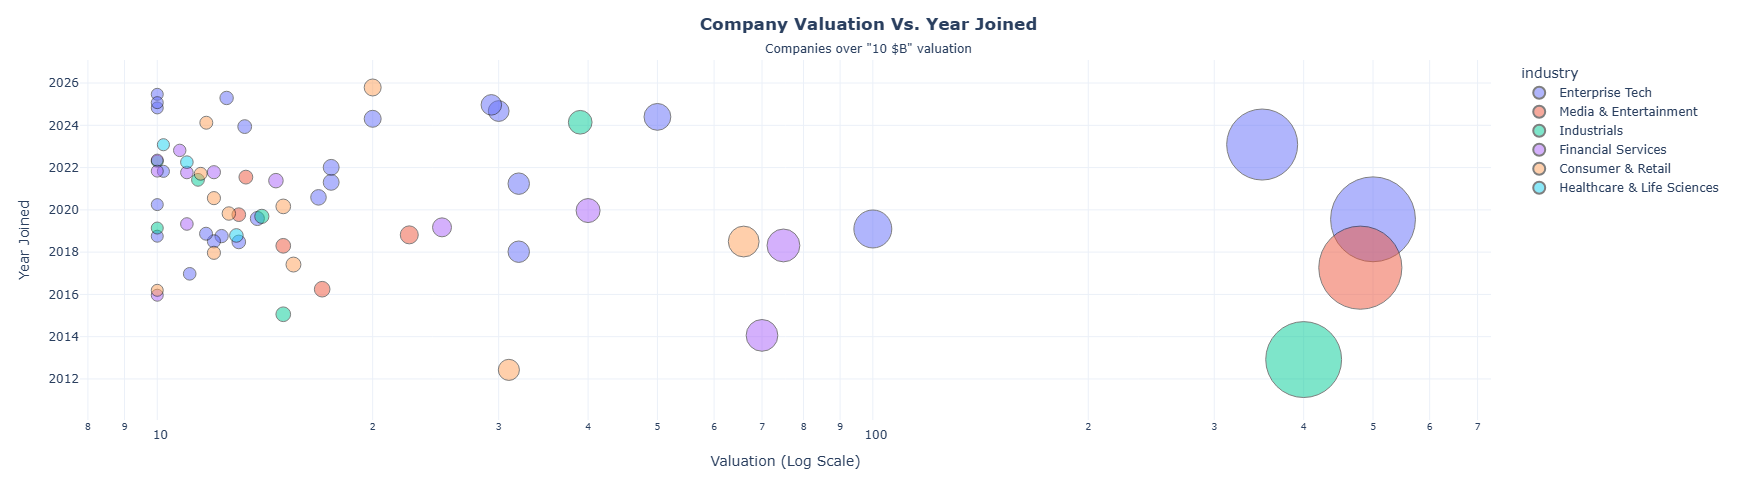

In [61]:
fig_bubble = px.scatter(
    df[df['size'].isin(['Decacorn', 'Hectocorn'])], x= 'valuation', y= 'date_joined', size= 'valuation', color= 'industry',
    hover_name= 'company', log_x= True, size_max= 60, template= 'plotly_white', subtitle= 'Companies over "10 $B" valuation',
    labels= {'valuation': 'Valuation ($B)', 'date_joined': 'Date Joined'},
    color_continuous_scale= 'magma')

fig_bubble.update_traces(marker= dict(line= dict(width= 1, color= 'black'), opacity= 0.5))

fig_bubble.update_layout(width = 1000, height= 500,
    xaxis_title= "Valuation (Log Scale)", yaxis_title= "Year Joined",
    title= {"text": "<b>Company Valuation Vs. Year Joined</b>", 'x': 0.5, "xanchor": "center"},
    hoverlabel= dict(bgcolor= "black", font_size= 14))

fig_bubble.show()

In [62]:
# df.to_csv(r"D:\Google Advanced Data Analytics\Projects_2026\Unicorn_Companies\Uni_Com_Processed.csv", index= False)

###### **2- Unicorn Companies across 7 Industries**:

1. Enterprise Tech.
2. Financial Services.
3. Consumer & Retail.
4. Industrials.
5. Healthcarre & Life Sciences.
6. Media & Entertainment.
7. Insurance.

In [63]:
industry_prop = round(df['industry'].value_counts(normalize= True) * 100, 2).reset_index()

industry_prop

,industry,proportion
0,Enterprise Tech,35.44
1,Financial Services,16.97
2,Consumer & Retail,15.61
3,Industrials,14.56
4,Healthcare & Life Sciences,9.43
5,Media & Entertainment,6.18
6,Insurance,1.81


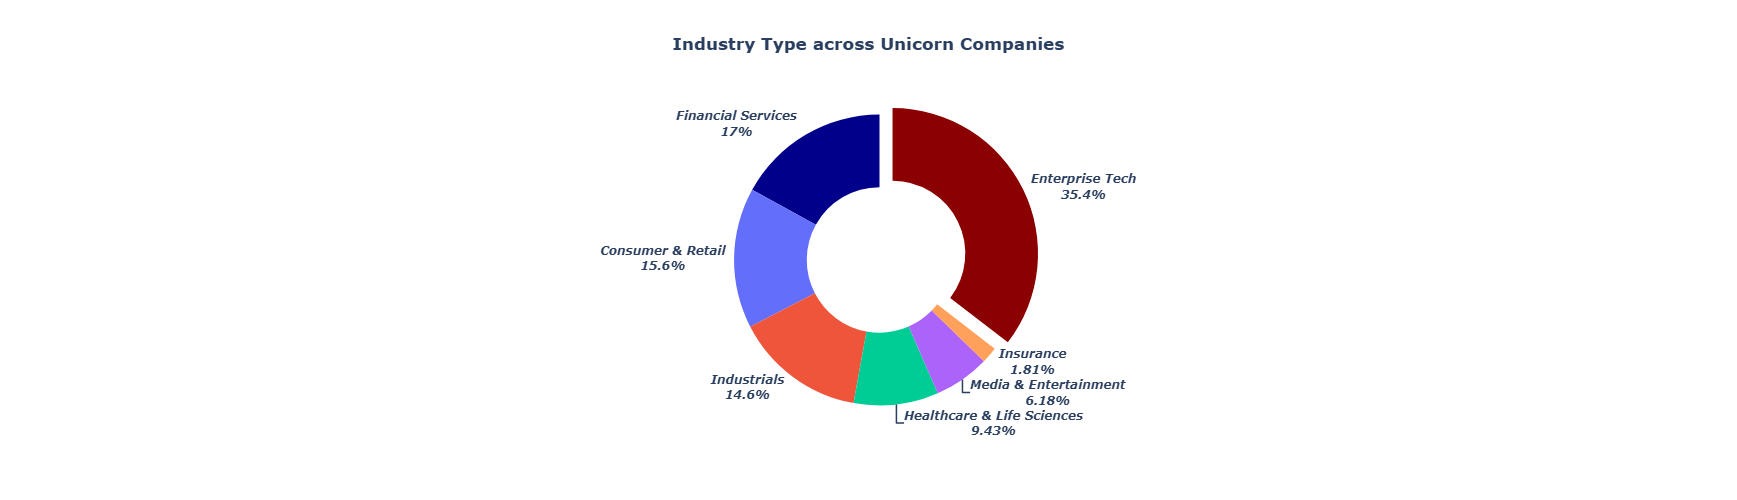

In [64]:
fig_ind_prop = go.Figure(data= [go.Pie(values= industry_prop['proportion'], labels= industry_prop['industry'], pull= [0.1, 0, 0, 0, 0, 0, 0], hole= 0.5, textinfo= "label+percent",\
                             textposition= "outside", textfont= dict(style= "italic", weight= "bold"), marker= dict(colors= ["darkred", "darkblue"]))])
fig_ind_prop.update_layout(width= 1000, height= 500, showlegend= False, title= {"text": "<b>Industry Type across Unicorn Companies</b>", 'x': 0.5, "xanchor": "center"})
fig_ind_prop.show()

###### **3- Unicorn Companies Joined per Year**:

In [65]:
year_joined = df['date_joined'].dt.year.value_counts().sort_index(ascending= False).reset_index()

year_joined.head()

,date_joined,count
0,2025,120
1,2024,85
2,2023,64
3,2022,243
4,2021,458


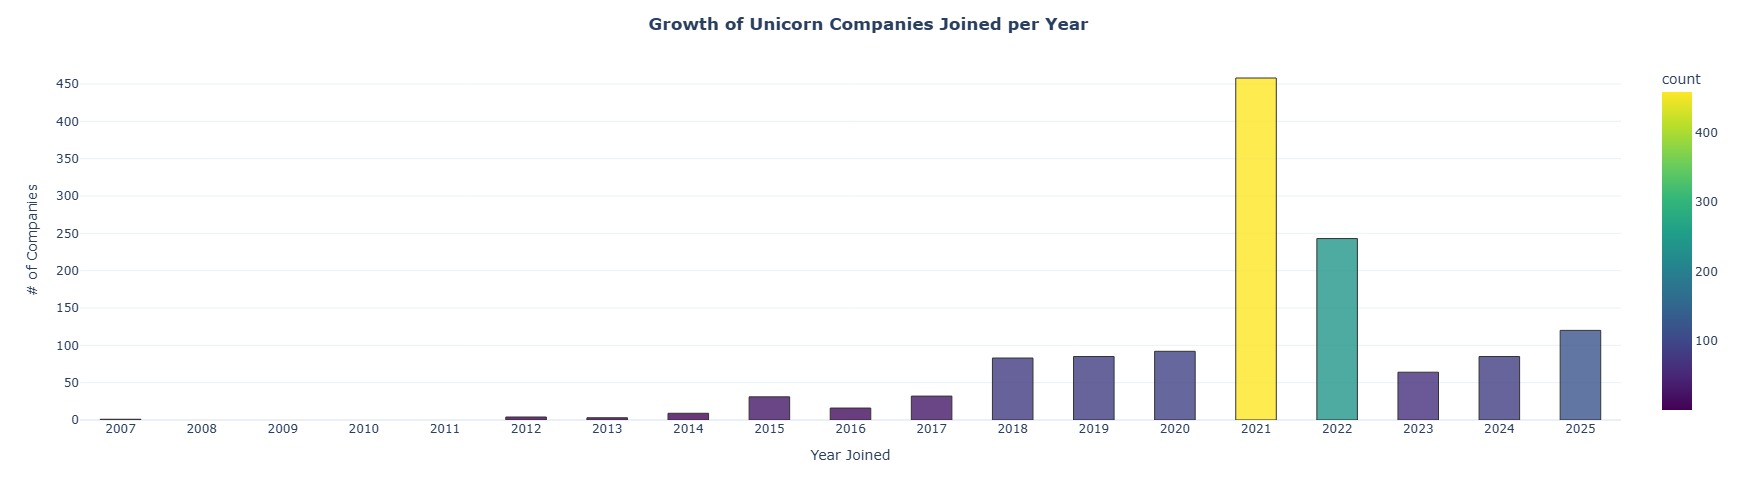

In [66]:
fig_outliers = px.bar(year_joined, x= 'date_joined', y= 'count', color_continuous_scale= 'viridis',\
                          opacity= 0.8, color= 'count', template= "plotly_white")

fig_outliers.update_traces(marker_line_width= 1, marker_line_color= 'black')
fig_outliers.update_layout(width= 1000, height= 500, bargap= 0.5, xaxis_range= [2006.5, 2025.5], hovermode= "x unified",\
                         xaxis= dict(tickmode= 'linear', tick0= 2005, dtick= 1, title= 'Year Joined'),\
                         yaxis_title= "# of Companies", title= {"text": "<b>Growth of Unicorn Companies Joined per Year</b>", 'x': 0.5, "xanchor": "center"})
fig_outliers.show()

###### **4- The Highest Companies in Valuation $B**:

In [67]:
# Calculating Interquartile Range:

iqr = df['valuation'].quantile(0.75) - df['valuation'].quantile(0.25)

print(f'The Interquartile Range = {iqr:.2f}')

The Interquartile Range = 1.90


In [68]:
upper_limit = df['valuation'].quantile(0.75) + 1.5 * iqr

print(f'The Upper Limit = {upper_limit:.2f}')

The Upper Limit = 5.85


In [69]:
df[df['valuation'] >= upper_limit].shape[0]

136

In [70]:
max_upper_limit = df['valuation'].quantile(0.75) + 7.5 * iqr

print(f'The Maximum Upper Limit = {max_upper_limit:.2f}')

The Maximum Upper Limit = 17.25


In [71]:
df[df['valuation'] >= max_upper_limit].shape[0]

22

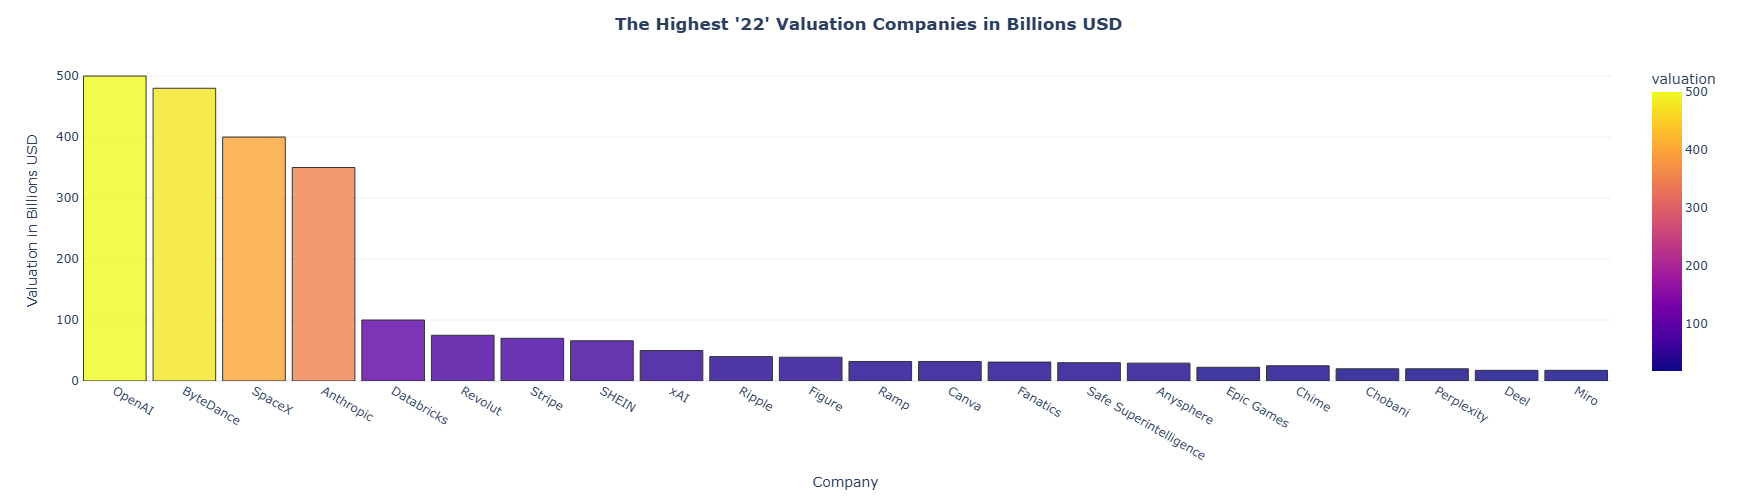

In [72]:
fig_outliers = px.bar(df[df['valuation'] >= max_upper_limit], x= 'company', y= 'valuation',\
                          opacity= 0.8, color= 'valuation', template= "plotly_white")

fig_outliers.update_traces(marker_line_width= 1, marker_line_color= 'black')
fig_outliers.update_layout(width= 1000, height= 500, bargap= 0.1, hovermode= "x unified",\
                         xaxis= dict(tickmode= 'linear', dtick= 1, title= 'Company'),\
                         yaxis_title= "Valuation in Billions USD", title= {"text": "<b>The Highest '22' Valuation Companies in Billions USD</b>", 'x': 0.5, "xanchor": "center"})
fig_outliers.show()

###### **5- Major Cities with more than 10 Unicorn Companies**:

In [73]:
city_com = df.groupby(['country', 'city'])['company'].count().sort_values(ascending= False).reset_index()

city_com = city_com[city_com['company'] >= 10]

In [74]:
top_12 = round(city_com['country'].value_counts(normalize= True), 2) *100

top_12 = top_12.reset_index()

top_12.T.style.background_gradient()

,0,1,2,3,4,5,6,7,8,9,10,11
country,United States,China,India,United Kingdom,France,Germany,Singapore,South Korea,Israel,Brazil,Canada,Netherlands
proportion,44.000000,15.000000,7.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


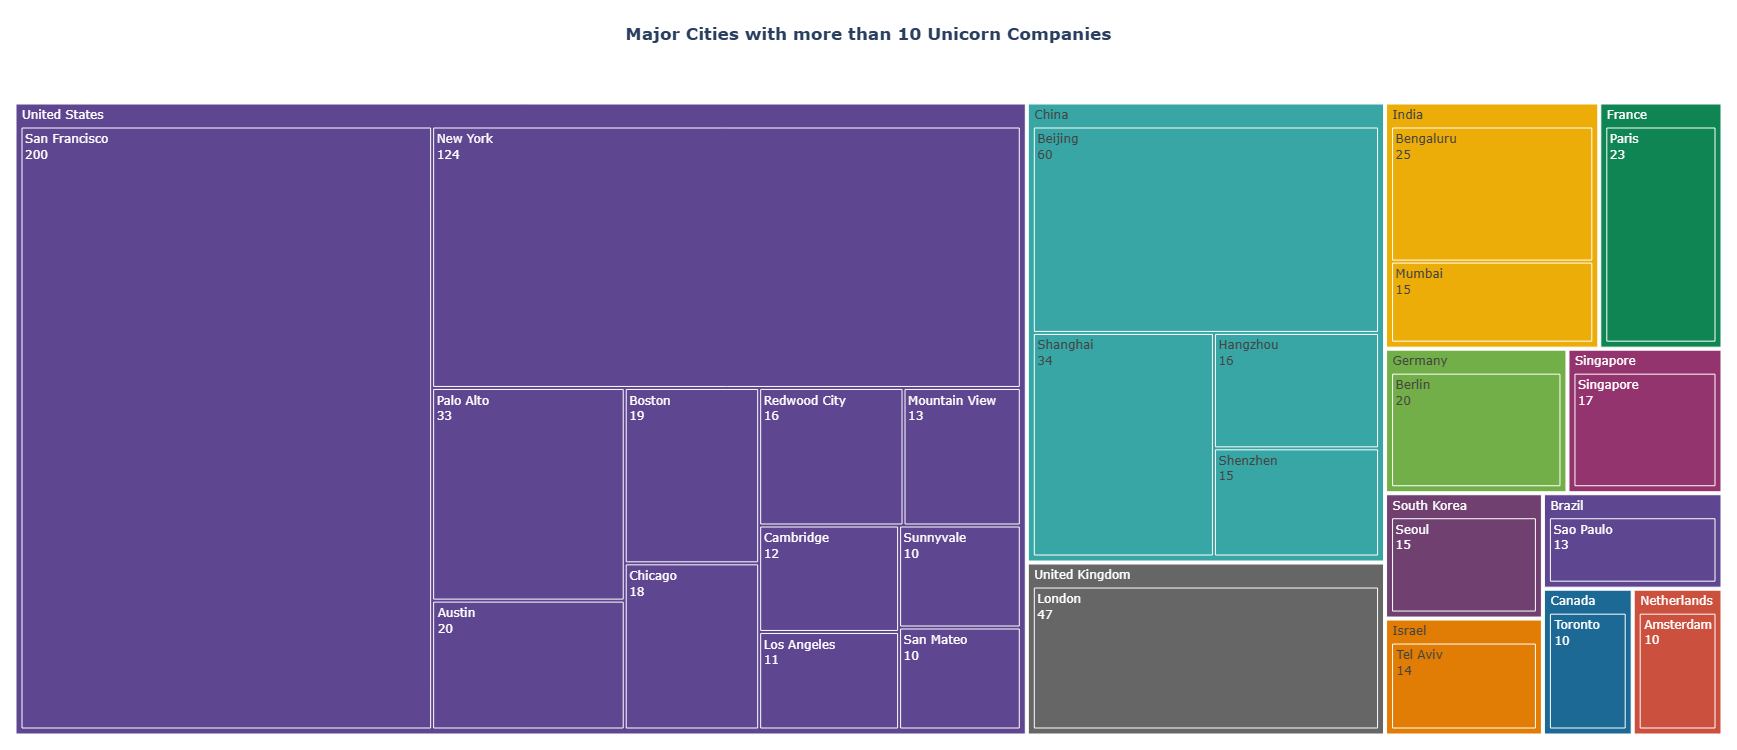

In [75]:
fig = px.treemap(city_com, 
    path=['country', 'city'], 
    values='company', color='country',
    color_discrete_sequence=px.colors.qualitative.Prism, hover_data={'company': ':,.0f'})

fig.update_layout(margin= dict(t=80, l=10, r=10, b=10), title= {"text": "<b>Major Cities with more than 10 Unicorn Companies</b>", 'x': 0.5, "xanchor": "center"}, width= 1500, height= 750)

fig.update_traces(textinfo="label+value")
fig.show()

###### **6- Total Valuations per Country in the World**:

In [76]:
total_val = df.groupby(['country'])['valuation'].sum().sort_values(ascending= False).reset_index()

total_val.head()

,country,valuation
0,United States,3771.31
1,China,869.72
2,United Kingdom,228.60
3,India,157.92
4,Germany,100.30


C:\Users\ahmed\AppData\Local\Temp\ipykernel_10476\4043428220.py:1: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



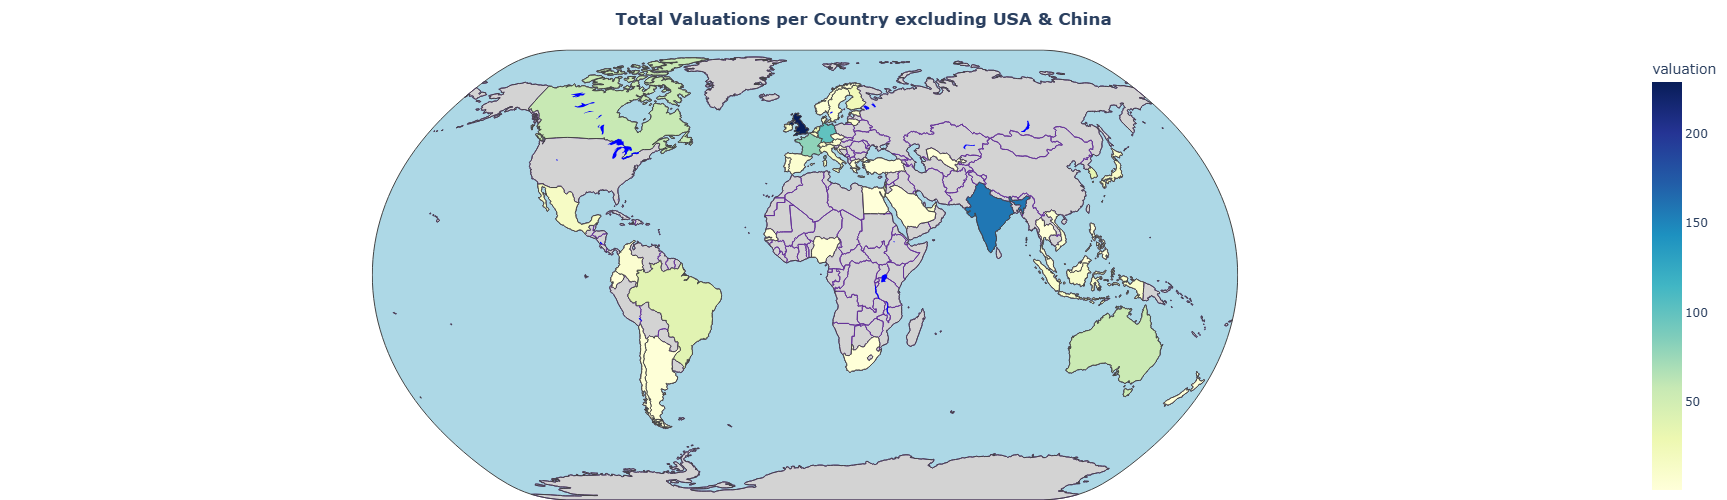

In [77]:
fig_map = px.choropleth(
    data_frame=total_val.loc[2:], locations="country", color="valuation",
    locationmode='country names', hover_name="country", projection="natural earth",
    color_continuous_scale="ylgnbu")

fig_map.update_geos(
    showcountries=True, countrycolor="RebeccaPurple",
    showland=True, landcolor="LightGrey",
    showocean=True, oceancolor="LightBlue",
    showlakes=True, lakecolor="Blue")

fig_map.update_layout(
    title_x=0.5, width=1000, height=500,
    title= {"text": "<b>Total Valuations per Country excluding USA & China</b>", 'x': 0.5, "xanchor": "center"},
    margin={"r":0,"t":50,"l":0,"b":0})

fig_map.show()

###### **7- Unicorn Companies in Australia**:

In [78]:
df[df['country'].isin(['Australia', 'New Zealand'])]

,company,valuation,date_joined,country,city,industry,select_investors,size
12,Canva,32.00,2018-01-08,Australia,Surry Hills,Enterprise Tech,"Sequoia Capital China, Blackbird Ventures, Mat...",Decacorn
84,Airwallex,8.00,2019-03-25,Australia,Melbourne,Financial Services,"DST Global, Sequoia Capital China, Tencent Hol...",Unicorn
244,firmus,3.92,2025-06-25,Australia,St Leonards,Enterprise Tech,unknown,Unicorn
406,Immutable,2.50,2022-03-07,Australia,Sydney,Media & Entertainment,"Fabric Ventures, AirTree Ventures, Temasek",Unicorn
490,GO1,2.00,2021-07-19,Australia,Brisbane,Enterprise Tech,"Y Combinator, M12, SEEK",Unicorn
609,SafetyCulture,1.67,2021-05-03,Australia,Sydney,Industrials,"Blackbird Ventures, IndexVentures, Tiger Globa...",Unicorn
642,Employment Hero,1.37,2023-10-18,Australia,Sydney,Enterprise Tech,"OneVentures, AirTree Ventures, AMP New Ventures",Unicorn
702,Culture Amp,1.50,2021-07-29,Australia,Richmond,Enterprise Tech,"Felicis Ventures, Index Ventures, Blackbird Ve...",Unicorn
838,LinkTree,1.30,2022-03-16,Australia,Melbourne,Media & Entertainment,"AirTree Ventures, Insight Partners, Index Vent...",Unicorn
1046,Halter,1.00,2025-06-23,New Zealand,Auckland,Enterprise Tech,"Bessemer Venture Partners, Blackbird Ventures",Unicorn


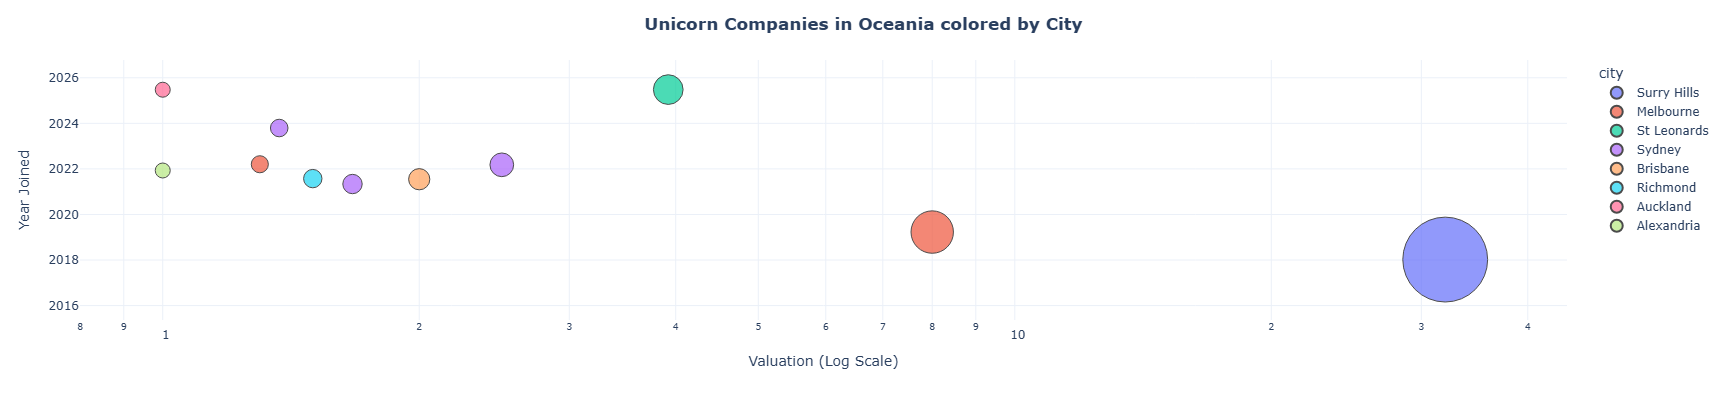

In [79]:
fig_bubble = px.scatter(
    df[df['country'].isin(['Australia', 'New Zealand'])], x= 'valuation', y= 'date_joined', size= 'valuation', color= 'city',
    hover_name= 'company', log_x= True, size_max= 60, template= 'plotly_white',
    labels= {'valuation': 'Valuation ($B)', 'date_joined': 'Date Joined'})

fig_bubble.update_traces(marker= dict(line= dict(width= 1, color= 'black'), opacity= 0.7))

fig_bubble.update_layout(width = 1000, height= 400,
    xaxis_title= "Valuation (Log Scale)", yaxis_title= "Year Joined",
    title= {"text": "<b>Unicorn Companies in Oceania colored by City</b>", 'x': 0.5, "xanchor": "center"},
    hoverlabel= dict(bgcolor= "black", font_size= 14))

fig_bubble.show()

###### **8- Unicorn Companies in [2025]**:

In [80]:
df[df['date_joined'].dt.year == 2025].head()

,company,valuation,date_joined,country,city,industry,select_investors,size
18,Chobani,20.0,2025-10-16,United States,New York,Consumer & Retail,unknown,Decacorn
37,Labs,12.5,2025-04-18,United States,Beverly Hills,Enterprise Tech,"JET Venture Capital, Sivad VC",Decacorn
56,Thinking Machines Lab,10.0,2025-06-20,United States,San Francisco,Enterprise Tech,"Andreessen Horowitz, Accel",Decacorn
61,Mercor,10.0,2025-01-27,United States,San Francisco,Enterprise Tech,"Felicis, Benchmark",Decacorn
71,Polymarket,9.0,2025-10-07,United States,New York,Financial Services,"1789 Capital, Founders Fund",Unicorn


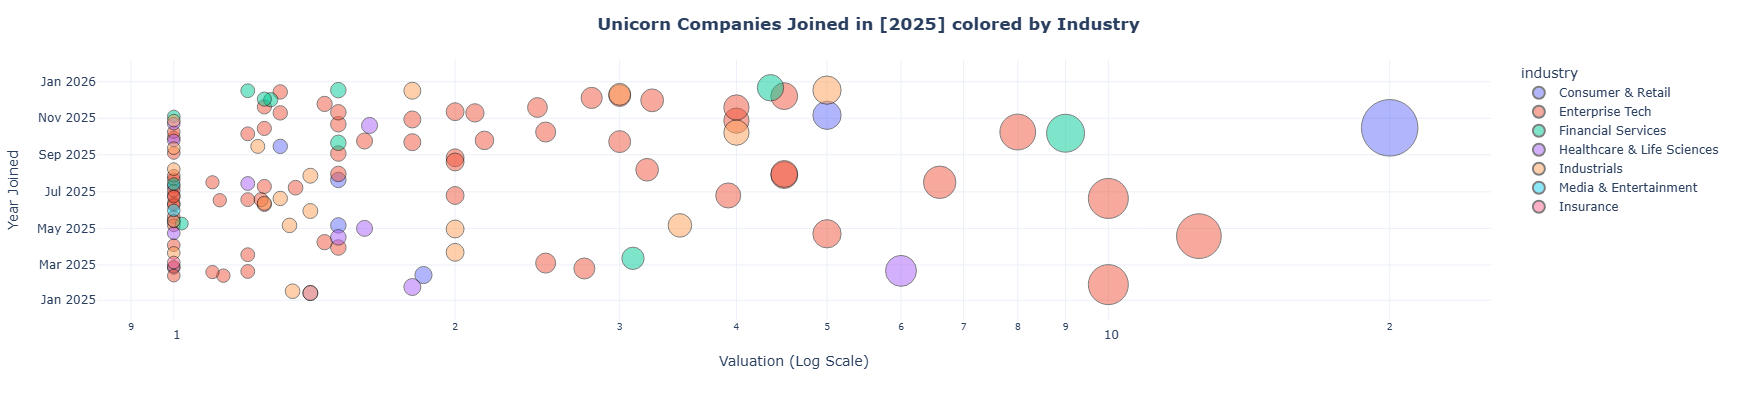

In [81]:
fig_bubble = px.scatter(
    df[df['date_joined'].dt.year == 2025], x= 'valuation', y= 'date_joined', size= 'valuation', color= 'industry',
    hover_name= 'company', log_x= True, size_max= 40, template= 'plotly_white',
    labels= {'valuation': 'Valuation ($B)', 'date_joined': 'Date Joined'})

fig_bubble.update_traces(marker= dict(line= dict(width= 1, color= 'black'), opacity= 0.5))

fig_bubble.update_layout(width = 1000, height= 400,
    xaxis_title= "Valuation (Log Scale)", yaxis_title= "Year Joined",
    title= {"text": "<b>Unicorn Companies Joined in [2025] colored by Industry</b>", 'x': 0.5, "xanchor": "center"},
    hoverlabel= dict(bgcolor= "black", font_size= 14))

fig_bubble.show()